#### Loading the libraries and dataframe

In [2]:
## Loading the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [3]:
## Loading the dataframe:

df=pd.read_excel('cohort_2013.xlsx')

In [4]:
## Checking the number of rows and columns and column names:

print("shape of database")
print(df.shape)

shape of database
(2256, 23)


#### See the null values in the dataframe

In [5]:
# # to see the null values in a heatmap:
# plt.figure(figsize=(14, 4))
# sns.heatmap(df.isnull(), cmap='viridis', cbar=False);

#### Dropping the null values and resetting the index

In [6]:
# Drop rows with null values and check the shape again
df = df.dropna()

In [7]:
df = df.reset_index(drop=True)

In [8]:
# Print the shape of the dataset (number of rows and columns)
print('Shape of dataset:', df.shape)

Shape of dataset: (944, 23)


In [9]:
df.columns

Index(['University', 'perc_PELL_awrd', 'perc_fed_grnt_aid',
       'perc_loca_grnt_aid', 'perc_loca_inst_aid', 'perc_std_loans',
       '8_yr_grad_rate', 'total_instate_tution_20', 'total_outstate_tution_20',
       'open_ad_13', 'school_gpa_13', 'college_prep_13', 'adms_test_scr_13',
       'SAT_verb_25per_13', 'SAT_verb_75per_13', 'SAT_math_25per_13',
       'SAT_math_75per_13', 'ACT_compo_25per_13', 'ACT_compo_75per_13',
       'ACT_verb_25per_13', 'ACT_verb_75per_13', 'ACT_math_25per_13',
       'ACT_math_75per_13'],
      dtype='object')

#### Creating categorical variables

In [10]:
## Fields with dichotomous values: 'open_ad_13', 'school_gpa_13', 'college_prep_13', 'adms_test_scr_13'

In [11]:
## 'open_ad_13'  has only one value, 'adms_test_scr_13' & 'school_gpa_13' is skewed, 'college_prep_13' is good

##### Admission test score requirements

In [12]:
df['college_prep_13'].value_counts()

college_prep_13
2.0    492
1.0    376
3.0     76
Name: count, dtype: int64

In [13]:
# Changing the values of admission test score requirements field with 1 and 2 
# where 1 is required and 2 is not required 
conditions = [
    df['adms_test_scr_13'] == 1.0,
   
    (df['adms_test_scr_13'] == 2.0) | (df['adms_test_scr_13'] == 3.0)
]
# Define the replacement values
values = [1.0, 0.0]

# Use numpy.select to replace values based on conditions
df['adms_test_scr_13'] = np.select(conditions, values)

In [14]:
# Changing the values of completion of college preparatory program field with 1 and 2 
# where 1 is required and 2 is not required 
conditions = [
    df['college_prep_13'] == 1.0,
    (df['college_prep_13'] == 2.0) | (df['college_prep_13'] == 3.0)
]

# Define the replacement values for each condition
values = [1.0, 0.0]

# Use numpy.select to replace values based on conditions
df['college_prep_13'] = np.select(conditions, values)

In [15]:
# Changing the values of completion of school GPA requirement field with 1 and 2 
# where 1 is required and 2 is not required 
conditions = [
    df['school_gpa_13'] == 1.0,
    (df['school_gpa_13'] == 2.0) | (df['school_gpa_13'] == 3.0)
]

# Define the replacement values for each condition
values = [1.0, 0.0]

# Use numpy.select to replace values based on conditions
df['school_gpa_13'] = np.select(conditions, values)


In [16]:
df.columns

Index(['University', 'perc_PELL_awrd', 'perc_fed_grnt_aid',
       'perc_loca_grnt_aid', 'perc_loca_inst_aid', 'perc_std_loans',
       '8_yr_grad_rate', 'total_instate_tution_20', 'total_outstate_tution_20',
       'open_ad_13', 'school_gpa_13', 'college_prep_13', 'adms_test_scr_13',
       'SAT_verb_25per_13', 'SAT_verb_75per_13', 'SAT_math_25per_13',
       'SAT_math_75per_13', 'ACT_compo_25per_13', 'ACT_compo_75per_13',
       'ACT_verb_25per_13', 'ACT_verb_75per_13', 'ACT_math_25per_13',
       'ACT_math_75per_13'],
      dtype='object')

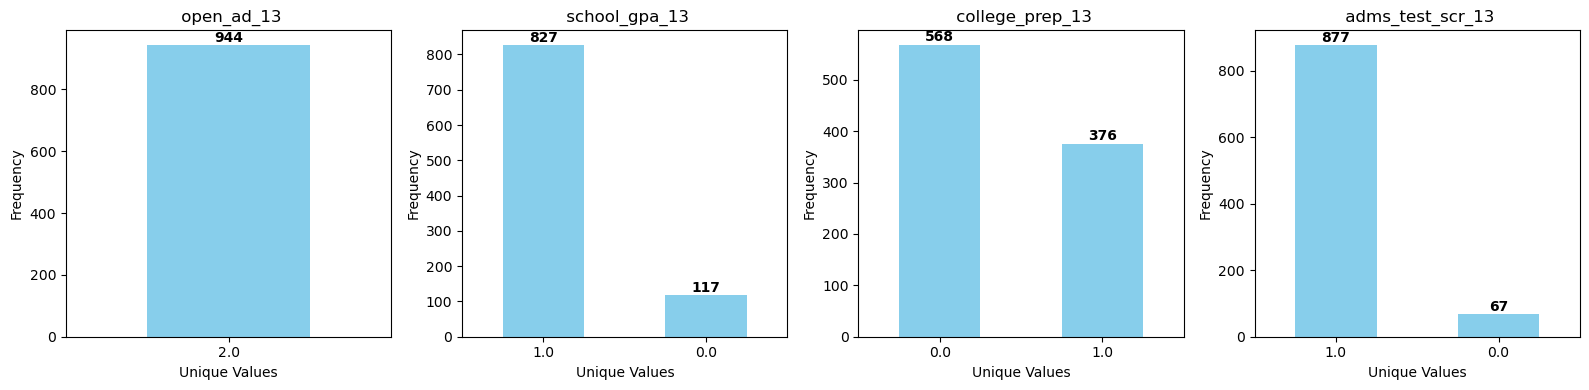

In [17]:
##Specify the four columns you want to analyze
columns_to_analyze = ['open_ad_13', 'school_gpa_13', 'college_prep_13', 'adms_test_scr_13'] 

# Create subplots for the four columns
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

# Loop through the specified columns and create bar charts in subplots
for i, column in enumerate(columns_to_analyze):
    # Get unique values and their frequencies in the column
    value_counts = df[column].value_counts()

    # Plot the frequencies in a bar chart
    ax = value_counts.plot(kind='bar', color='skyblue', ax=axes[i])
    ax.set_xlabel('Unique Values')
    ax.set_ylabel('Frequency')
    ax.set_title(f' {column}')

    # Add labels for each column
    for j, v in enumerate(value_counts):
        ax.text(j, v + 1, str(v), ha='center', va='bottom', fontsize=10, fontweight='bold')

    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)  # Rotate x-axis labels if necessary

# Adjust the layout for subplots
plt.tight_layout()
plt.show()

In [18]:
df_continuous = df[['perc_PELL_awrd', 'perc_fed_grnt_aid',
       'perc_loca_grnt_aid', 'perc_loca_inst_aid', 'perc_std_loans',
       '8_yr_grad_rate', 'total_instate_tution_20', 'total_outstate_tution_20',
       'SAT_verb_25per_13', 'SAT_verb_75per_13', 'SAT_math_25per_13',
       'SAT_math_75per_13', 'ACT_compo_25per_13', 'ACT_compo_75per_13',
       'ACT_verb_25per_13', 'ACT_verb_75per_13', 'ACT_math_25per_13',
       'ACT_math_75per_13']]

df_continuous_independent = df[['perc_PELL_awrd', 'perc_fed_grnt_aid',
       'perc_loca_grnt_aid', 'perc_loca_inst_aid', 'perc_std_loans'
       , 'total_instate_tution_20', 'total_outstate_tution_20',
       'SAT_verb_25per_13', 'SAT_verb_75per_13', 'SAT_math_25per_13',
       'SAT_math_75per_13', 'ACT_compo_25per_13', 'ACT_compo_75per_13',
       'ACT_verb_25per_13', 'ACT_verb_75per_13', 'ACT_math_25per_13',
       'ACT_math_75per_13']]

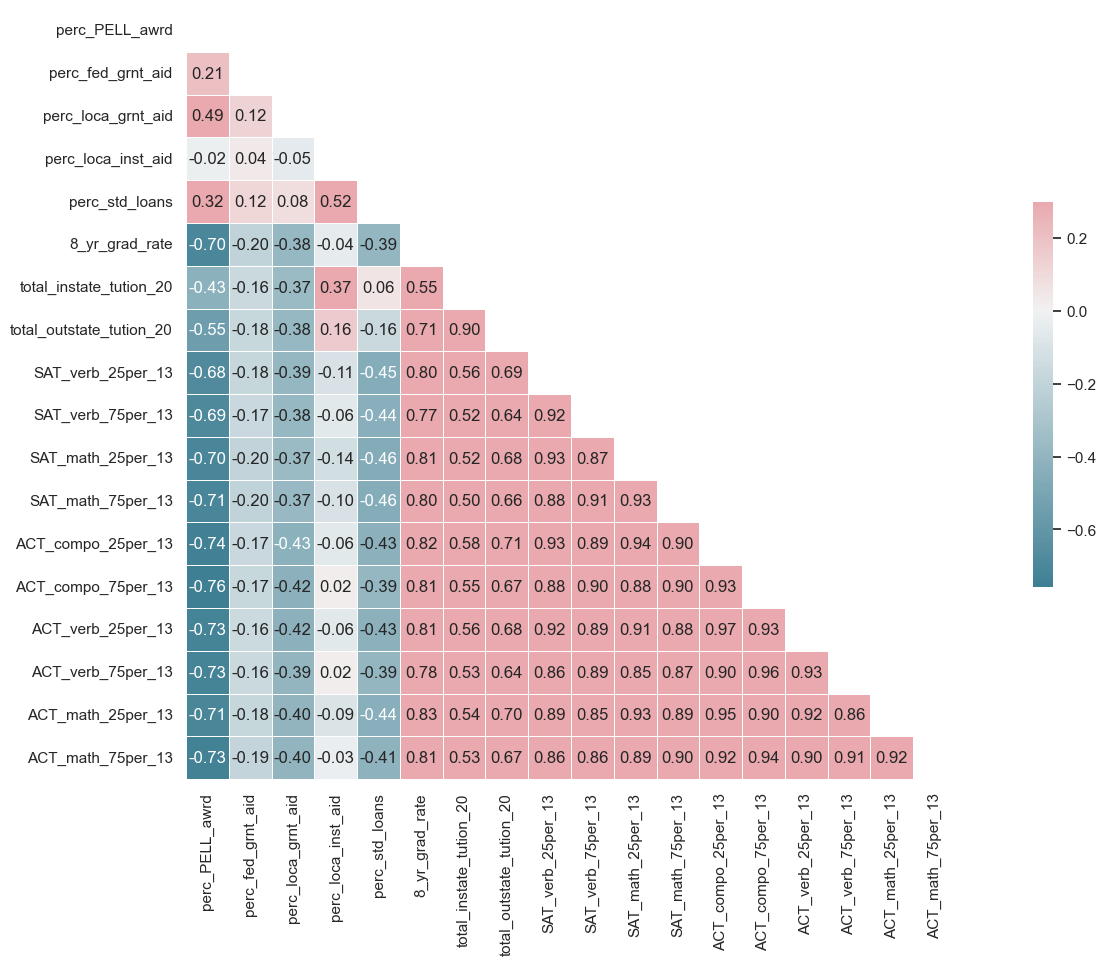

In [19]:
# Correlation Matrix
sns.set(style="white")

# Compute the correlation matrix
corr = df_continuous.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with annotations
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, annot=True, fmt=".2f",
            cbar_kws={"shrink": .5})

plt.show()

In [20]:
df_continuous_independent.columns

Index(['perc_PELL_awrd', 'perc_fed_grnt_aid', 'perc_loca_grnt_aid',
       'perc_loca_inst_aid', 'perc_std_loans', 'total_instate_tution_20',
       'total_outstate_tution_20', 'SAT_verb_25per_13', 'SAT_verb_75per_13',
       'SAT_math_25per_13', 'SAT_math_75per_13', 'ACT_compo_25per_13',
       'ACT_compo_75per_13', 'ACT_verb_25per_13', 'ACT_verb_75per_13',
       'ACT_math_25per_13', 'ACT_math_75per_13'],
      dtype='object')

In [21]:
# Calculate the median of two columns
median_SAT_verbal = (df['SAT_verb_25per_13'] + df['SAT_verb_75per_13']) / 2
median_SAT_math = (df['SAT_math_25per_13'] + df['SAT_math_75per_13']) / 2
median_ACT_composite = (df['ACT_compo_25per_13'] + df['ACT_compo_75per_13']) / 2
median_ACT_verbal = (df['ACT_verb_25per_13'] + df['ACT_verb_75per_13']) / 2
median_ACT_math = (df['ACT_math_25per_13'] + df['ACT_math_75per_13']) / 2

# Replace the original columns with the calculated medians
df['SAT_verbal_median_13'] = median_SAT_verbal
df['SAT_math_median_13'] = median_SAT_math
df['ACT_composite_median_13'] = median_ACT_composite
df['ACT_verbal_median_13'] = median_ACT_verbal
df['ACT_math_median_13'] = median_ACT_math

# Drop the original columns
df.drop(['SAT_verb_25per_13', 'SAT_verb_75per_13',
         'SAT_math_25per_13', 'SAT_math_75per_13',
         'ACT_compo_25per_13', 'ACT_compo_75per_13',
         'ACT_verb_25per_13', 'ACT_verb_75per_13',
         'ACT_math_25per_13', 'ACT_math_75per_13'], axis=1, inplace=True)


## Calculating average tuition
avg_tuition_20 = (df['total_instate_tution_20'] + df['total_outstate_tution_20']) / 2

df['avg_tuition_20'] = avg_tuition_20

from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Reshape the 'avg_tuition_20' variable to a 2D array (required by StandardScaler)
tuition_20 = df['avg_tuition_20'].values.reshape(-1, 1)

# Fit and transform the scaler on the variable
scaled_tuition_20 = scaler.fit_transform(tuition_20)

# Replace the original 'avg_tuition_20' column with the scaled values
df['avg_tuition_20'] = scaled_tuition_20


# # Replace the original columns with the calculated medians
# df['avg_tuition_20'] = avg_tuition_20

# Drop the original columns
df.drop(['total_instate_tution_20', 'total_outstate_tution_20'
         ], axis=1, inplace=True)


## dropping 'open_ad_13'  since it has only one value:
df.drop(['open_ad_13'
         ], axis=1, inplace=True)



## dropping 'University name'  since it has only one value:
df.drop(['University'
         ], axis=1, inplace=True)

df.head(4)

,perc_PELL_awrd,perc_fed_grnt_aid,perc_loca_grnt_aid,perc_loca_inst_aid,perc_std_loans,8_yr_grad_rate,school_gpa_13,college_prep_13,adms_test_scr_13,SAT_verbal_median_13,SAT_math_median_13,ACT_composite_median_13,ACT_verbal_median_13,ACT_math_median_13,avg_tuition_20
0,27.0,10.0,33.0,99.0,55.0,62.0,0.0,0.0,1.0,525.0,545.0,24.0,24.0,24.0,0.629559
1,45.0,83.0,60.0,34.0,36.0,25.0,1.0,0.0,1.0,455.0,445.0,18.5,18.0,18.5,-1.706421
2,54.0,56.0,44.0,77.0,70.0,35.0,1.0,0.0,1.0,486.5,500.0,19.5,19.0,19.5,-1.017238
3,30.0,57.0,31.0,90.0,46.0,73.0,1.0,0.0,1.0,550.0,570.0,21.5,23.0,24.5,1.299322


In [22]:
df.shape

(944, 15)

In [23]:
#### 14 independent variable and one dependent variable

In [24]:
df.columns

Index(['perc_PELL_awrd', 'perc_fed_grnt_aid', 'perc_loca_grnt_aid',
       'perc_loca_inst_aid', 'perc_std_loans', '8_yr_grad_rate',
       'school_gpa_13', 'college_prep_13', 'adms_test_scr_13',
       'SAT_verbal_median_13', 'SAT_math_median_13', 'ACT_composite_median_13',
       'ACT_verbal_median_13', 'ACT_math_median_13', 'avg_tuition_20'],
      dtype='object')

In [25]:
df_continuous = df[['perc_PELL_awrd', 'perc_fed_grnt_aid', 'perc_loca_grnt_aid',
       'perc_loca_inst_aid', 'perc_std_loans', '8_yr_grad_rate',
       'SAT_verbal_median_13', 'SAT_math_median_13', 'ACT_composite_median_13',
       'ACT_verbal_median_13', 'ACT_math_median_13', 'avg_tuition_20']]

<Figure size 1800x1400 with 0 Axes>

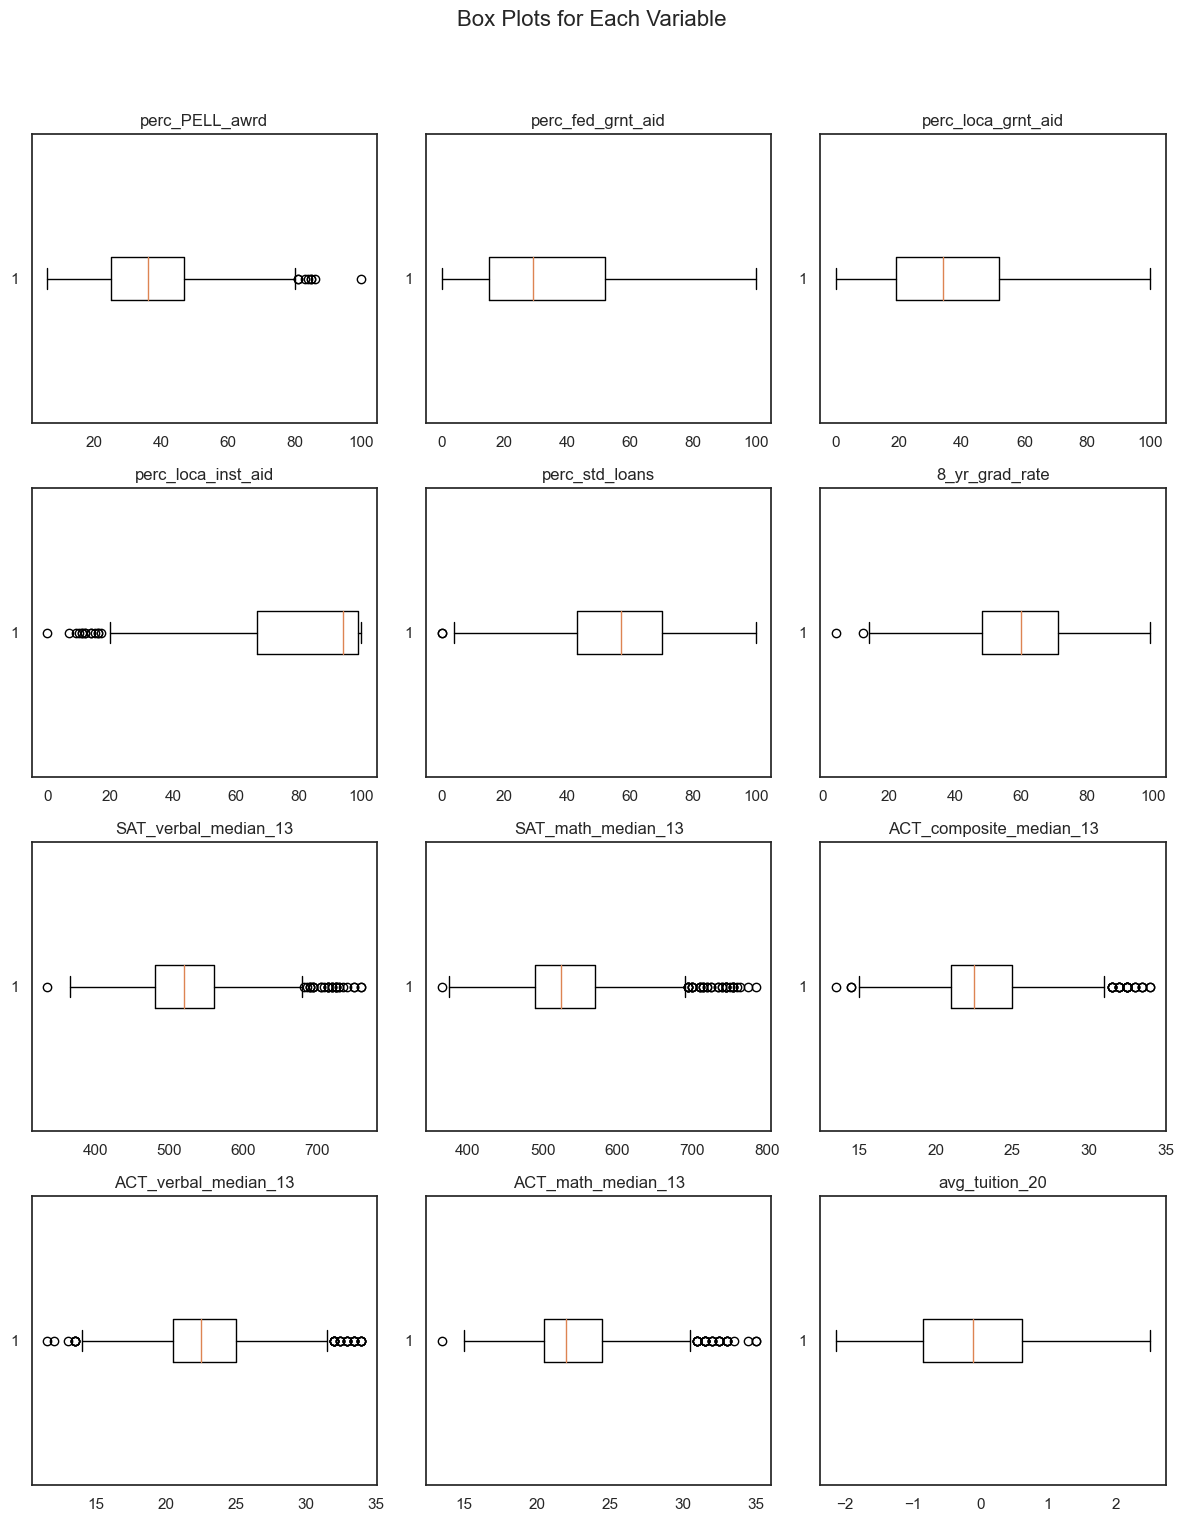

In [26]:
fig = plt.figure(figsize=(18, 14))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)

# Calculate the number of rows and columns for subplots
num_rows = (df_continuous.shape[1] + 2) // 3  # 3 columns per row
num_cols = min(df_continuous.shape[1], 3)

# Create subplots for each column
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4 * num_rows))
fig.suptitle('Box Plots for Each Variable', fontsize=16)

# Loop through each column in the DataFrame
for i, column in enumerate(df_continuous.columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    # Create a box plot for the current column
    ax.boxplot(df_continuous[column], vert=False)
    ax.set_title(column)
    ax.set_xlabel('')

# Remove empty subplots
for i in range(df_continuous.shape[1], num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [27]:
def remove_outliers_iqr(dataframe, columns, threshold=1.5):
    """
    Remove outliers from specified columns using the IQR method.

    Parameters:
        dataframe (pd.DataFrame): The DataFrame containing the data.
        columns (list): List of column names to remove outliers from.
        threshold (float): The threshold for detecting outliers (default is 1.5).

    Returns:
        pd.DataFrame: The DataFrame with outliers removed from specified columns.
    """
    df_cleaned = dataframe.copy()
    
    for column in columns:
        Q1 = dataframe[column].quantile(0.25)
        Q3 = dataframe[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]
    
    return df_cleaned

df = df

columns_to_remove_outliers = df_continuous.columns
threshold_value = 1.5

df = remove_outliers_iqr(df, columns_to_remove_outliers, threshold=threshold_value)

<Figure size 1800x1400 with 0 Axes>

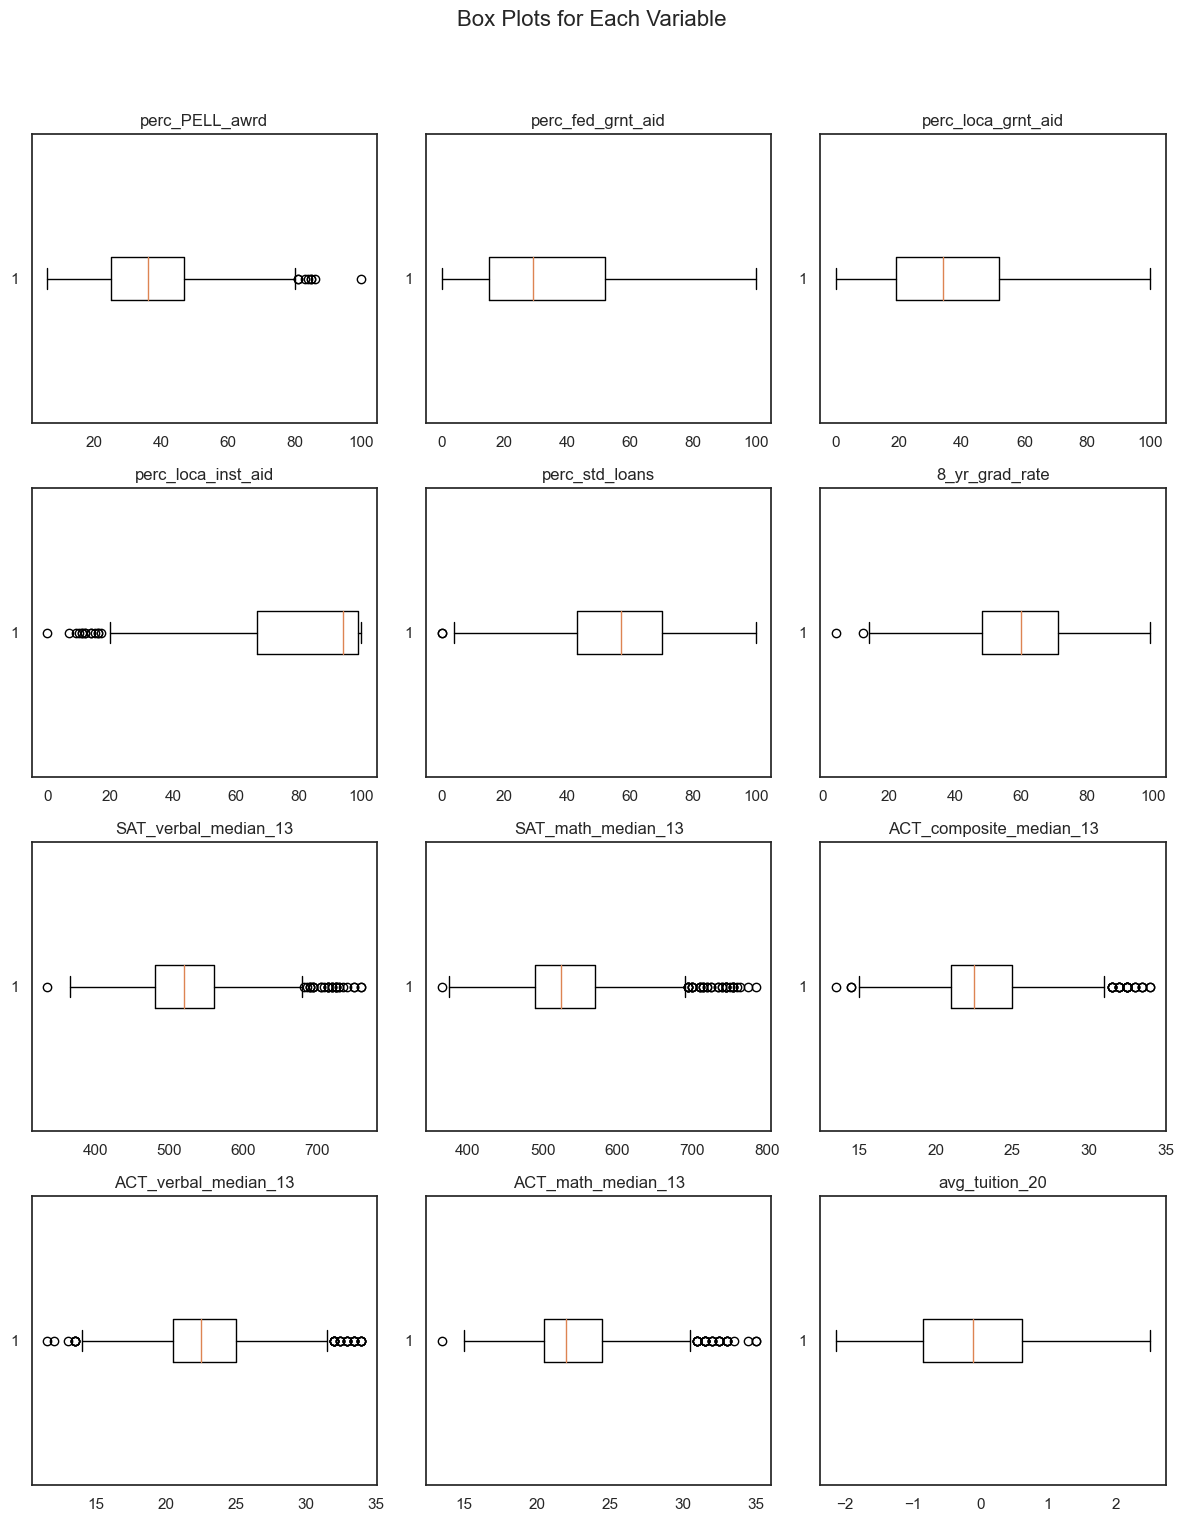

In [28]:
fig = plt.figure(figsize=(18, 14))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)

# Calculate the number of rows and columns for subplots
num_rows = (df_continuous.shape[1] + 2) // 3  # 3 columns per row
num_cols = min(df_continuous.shape[1], 3)

# Create subplots for each column
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4 * num_rows))
fig.suptitle('Box Plots for Each Variable', fontsize=16)

# Loop through each column in the DataFrame
for i, column in enumerate(df_continuous.columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    # Create a box plot for the current column
    ax.boxplot(df_continuous[column], vert=False)
    ax.set_title(column)
    ax.set_xlabel('')

# Remove empty subplots
for i in range(df_continuous.shape[1], num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [29]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
df.columns

Index(['perc_PELL_awrd', 'perc_fed_grnt_aid', 'perc_loca_grnt_aid',
       'perc_loca_inst_aid', 'perc_std_loans', '8_yr_grad_rate',
       'school_gpa_13', 'college_prep_13', 'adms_test_scr_13',
       'SAT_verbal_median_13', 'SAT_math_median_13', 'ACT_composite_median_13',
       'ACT_verbal_median_13', 'ACT_math_median_13', 'avg_tuition_20'],
      dtype='object')

In [32]:
scaler = MinMaxScaler()
num_vars = [
    
    'perc_PELL_awrd', 'perc_fed_grnt_aid', 'perc_loca_grnt_aid',
       'perc_loca_inst_aid', 'perc_std_loans', '8_yr_grad_rate',
 
       'SAT_verbal_median_13', 'SAT_math_median_13', 'ACT_composite_median_13',
       'ACT_verbal_median_13', 'ACT_math_median_13'
       
       ]




df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [33]:
df_train.head(5)


,perc_PELL_awrd,perc_fed_grnt_aid,perc_loca_grnt_aid,perc_loca_inst_aid,perc_std_loans,8_yr_grad_rate,school_gpa_13,college_prep_13,adms_test_scr_13,SAT_verbal_median_13,SAT_math_median_13,ACT_composite_median_13,ACT_verbal_median_13,ACT_math_median_13,avg_tuition_20
839,0.277778,0.13,0.208333,0.9000,0.446809,0.779221,1.0,1.0,1.0,0.664903,0.677419,0.607143,0.65625,0.666667,1.991606
181,0.652778,0.87,0.614583,0.7250,0.521277,0.324675,1.0,0.0,1.0,0.312169,0.290323,0.321429,0.34375,0.185185,-1.198620
627,0.569444,0.02,0.489583,0.7500,0.489362,0.350649,0.0,0.0,1.0,0.259259,0.419355,0.321429,0.37500,0.333333,-1.187090
565,0.458333,0.78,0.458333,1.0000,0.787234,0.662338,1.0,0.0,1.0,0.594356,0.693548,0.571429,0.56250,0.592593,0.929883
870,0.125000,0.26,0.187500,0.1625,0.223404,0.948052,1.0,1.0,1.0,0.700176,1.000000,0.821429,0.84375,0.888889,-0.218013


In [34]:
df_train.shape

(609, 15)

In [35]:
df_train.rename(columns={
    
    'perc_PELL_awrd': "%_students_received_PELL",
    'perc_fed_grnt_aid': "%_students_received_Federal_Grant",
    'perc_loca_grnt_aid': '%_students_received_Local_Grant',
    'perc_loca_inst_aid': '%_students_received_Institutional_Aid',
    'perc_std_loans': '%_students_received_Loans',
    'school_gpa_13': 'School_GPA_Requirement',
    'college_prep_13': 'College_Preparatory_Program_Requirement',
    'adms_test_scr_13': 'Admission_test_score_requirement',
    'SAT_verbal_median_13': 'SAT_Median_Verbal_Score_2013',
    'SAT_math_median_13': 'SAT_Median_Math_Score_2013',
    'ACT_composite_median_13': 'ACT_Median_Composite_Score_2013',
    'ACT_verbal_median_13': 'ACT_Median_Verbal_Score_2013',
    'ACT_math_median_13': 'ACT_Median_Math_Score_2013',
    'avg_tuition_20': 'Average_tuition_cost'



    
}, inplace=True)

df_train.head(3)

,%_students_received_PELL,%_students_received_Federal_Grant,%_students_received_Local_Grant,%_students_received_Institutional_Aid,%_students_received_Loans,8_yr_grad_rate,School_GPA_Requirement,College_Preparatory_Program_Requirement,Admission_test_score_requirement,SAT_Median_Verbal_Score_2013,SAT_Median_Math_Score_2013,ACT_Median_Composite_Score_2013,ACT_Median_Verbal_Score_2013,ACT_Median_Math_Score_2013,Average_tuition_cost
839,0.277778,0.13,0.208333,0.900,0.446809,0.779221,1.0,1.0,1.0,0.664903,0.677419,0.607143,0.65625,0.666667,1.991606
181,0.652778,0.87,0.614583,0.725,0.521277,0.324675,1.0,0.0,1.0,0.312169,0.290323,0.321429,0.34375,0.185185,-1.198620
627,0.569444,0.02,0.489583,0.750,0.489362,0.350649,0.0,0.0,1.0,0.259259,0.419355,0.321429,0.37500,0.333333,-1.187090


In [36]:
df_train.columns

Index(['%_students_received_PELL', '%_students_received_Federal_Grant',
       '%_students_received_Local_Grant',
       '%_students_received_Institutional_Aid', '%_students_received_Loans',
       '8_yr_grad_rate', 'School_GPA_Requirement',
       'College_Preparatory_Program_Requirement',
       'Admission_test_score_requirement', 'SAT_Median_Verbal_Score_2013',
       'SAT_Median_Math_Score_2013', 'ACT_Median_Composite_Score_2013',
       'ACT_Median_Verbal_Score_2013', 'ACT_Median_Math_Score_2013',
       'Average_tuition_cost'],
      dtype='object')

In [37]:
# plt.figure(figsize = (30, 25))
# sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
# plt.show()

In [38]:
#Dividing data into X and y variables
y_train = df_train.pop('8_yr_grad_rate')
X_train = df_train

In [39]:
X_train.head(4)

,%_students_received_PELL,%_students_received_Federal_Grant,%_students_received_Local_Grant,%_students_received_Institutional_Aid,%_students_received_Loans,School_GPA_Requirement,College_Preparatory_Program_Requirement,Admission_test_score_requirement,SAT_Median_Verbal_Score_2013,SAT_Median_Math_Score_2013,ACT_Median_Composite_Score_2013,ACT_Median_Verbal_Score_2013,ACT_Median_Math_Score_2013,Average_tuition_cost
839,0.277778,0.13,0.208333,0.900,0.446809,1.0,1.0,1.0,0.664903,0.677419,0.607143,0.65625,0.666667,1.991606
181,0.652778,0.87,0.614583,0.725,0.521277,1.0,0.0,1.0,0.312169,0.290323,0.321429,0.34375,0.185185,-1.198620
627,0.569444,0.02,0.489583,0.750,0.489362,0.0,0.0,1.0,0.259259,0.419355,0.321429,0.37500,0.333333,-1.187090
565,0.458333,0.78,0.458333,1.000,0.787234,1.0,0.0,1.0,0.594356,0.693548,0.571429,0.56250,0.592593,0.929883


In [40]:
y_train.head(3)

839    0.779221
181    0.324675
627    0.350649
Name: 8_yr_grad_rate, dtype: float64

In [41]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [42]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [43]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

TypeError: LinearRegression.__init__() got an unexpected keyword argument 'normalize'

In [ ]:
 ##Fitting the linear regression into Recursive Feature Elimination

rfe = RFE(lm, 14)
rfe = rfe.fit(X_train, y_train)

In [ ]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('%_students_received_PELL', True, 1),
 ('%_students_received_Federal_Grant', True, 1),
 ('%_students_received_Local_Grant', True, 1),
 ('%_students_received_Institutional_Aid', True, 1),
 ('%_students_received_Loans', True, 1),
 ('School_GPA_Requirement', True, 1),
 ('College_Preparatory_Program_Requirement', True, 1),
 ('Admission_test_score_requirement', True, 1),
 ('SAT_Median_Verbal_Score_2013', True, 1),
 ('SAT_Median_Math_Score_2013', True, 1),
 ('ACT_Median_Composite_Score_2013', True, 1),
 ('ACT_Median_Verbal_Score_2013', True, 1),
 ('ACT_Median_Math_Score_2013', True, 1),
 ('Average_tuition_cost', True, 1)]

In [ ]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,%_students_received_PELL,%_students_received_Federal_Grant,%_students_received_Local_Grant,%_students_received_Institutional_Aid,%_students_received_Loans,School_GPA_Requirement,College_Preparatory_Program_Requirement,Admission_test_score_requirement,SAT_Median_Verbal_Score_2013,SAT_Median_Math_Score_2013,ACT_Median_Composite_Score_2013,ACT_Median_Verbal_Score_2013,ACT_Median_Math_Score_2013,Average_tuition_cost
839,0.277778,0.13,0.208333,0.9000,0.446809,1.0,1.0,1.0,0.664903,0.677419,0.607143,0.65625,0.666667,1.991606
181,0.652778,0.87,0.614583,0.7250,0.521277,1.0,0.0,1.0,0.312169,0.290323,0.321429,0.34375,0.185185,-1.198620
627,0.569444,0.02,0.489583,0.7500,0.489362,0.0,0.0,1.0,0.259259,0.419355,0.321429,0.37500,0.333333,-1.187090
565,0.458333,0.78,0.458333,1.0000,0.787234,1.0,0.0,1.0,0.594356,0.693548,0.571429,0.56250,0.592593,0.929883
870,0.125000,0.26,0.187500,0.1625,0.223404,1.0,1.0,1.0,0.700176,1.000000,0.821429,0.84375,0.888889,-0.218013


In [ ]:
X_train_rfe.columns

Index(['%_students_received_PELL', '%_students_received_Federal_Grant',
       '%_students_received_Local_Grant',
       '%_students_received_Institutional_Aid', '%_students_received_Loans',
       'School_GPA_Requirement', 'College_Preparatory_Program_Requirement',
       'Admission_test_score_requirement', 'SAT_Median_Verbal_Score_2013',
       'SAT_Median_Math_Score_2013', 'ACT_Median_Composite_Score_2013',
       'ACT_Median_Verbal_Score_2013', 'ACT_Median_Math_Score_2013',
       'Average_tuition_cost'],
      dtype='object')

In [ ]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [ ]:
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:         8_yr_grad_rate   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     104.1
Date:                Tue, 19 Sep 2023   Prob (F-statistic):          1.76e-149
Time:                        09:50:26   Log-Likelihood:                 498.53
No. Observations:                 609   AIC:                            -967.1
Df Residuals:                     594   BIC:                            -900.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [ ]:
X_train.columns

Index(['%_students_received_PELL', '%_students_received_Federal_Grant',
       '%_students_received_Local_Grant',
       '%_students_received_Institutional_Aid', '%_students_received_Loans',
       'School_GPA_Requirement', 'College_Preparatory_Program_Requirement',
       'Admission_test_score_requirement', 'SAT_Median_Verbal_Score_2013',
       'SAT_Median_Math_Score_2013', 'ACT_Median_Composite_Score_2013',
       'ACT_Median_Verbal_Score_2013', 'ACT_Median_Math_Score_2013',
       'Average_tuition_cost'],
      dtype='object')

In [ ]:
X_train.columns[rfe.support_]

Index(['%_students_received_PELL', '%_students_received_Federal_Grant',
       '%_students_received_Local_Grant',
       '%_students_received_Institutional_Aid', '%_students_received_Loans',
       'School_GPA_Requirement', 'College_Preparatory_Program_Requirement',
       'Admission_test_score_requirement', 'SAT_Median_Verbal_Score_2013',
       'SAT_Median_Math_Score_2013', 'ACT_Median_Composite_Score_2013',
       'ACT_Median_Verbal_Score_2013', 'ACT_Median_Math_Score_2013',
       'Average_tuition_cost'],
      dtype='object')

In [ ]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new)

,Features,VIF
0,const,96.45
11,ACT_Median_Composite_Score_2013,34.30
12,ACT_Median_Verbal_Score_2013,17.32
13,ACT_Median_Math_Score_2013,15.43
10,SAT_Median_Math_Score_2013,8.98
9,SAT_Median_Verbal_Score_2013,7.36
1,%_students_received_PELL,2.41
4,%_students_received_Institutional_Aid,1.87
14,Average_tuition_cost,1.87
5,%_students_received_Loans,1.75


In [ ]:
##Dropping the %_students_received_Local_Grant since it is not statistically significant

X_train_new = X_train_rfe.drop(["ACT_Median_Composite_Score_2013",'ACT_Median_Verbal_Score_2013' ], axis = 1)

In [ ]:
##Model 2:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:         8_yr_grad_rate   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     120.1
Date:                Tue, 19 Sep 2023   Prob (F-statistic):          3.36e-150
Time:                        09:50:26   Log-Likelihood:                 495.29
No. Observations:                 609   AIC:                            -964.6
Df Residuals:                     596   BIC:                            -907.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [ ]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new)

,Features,VIF
0,const,96.06
10,SAT_Median_Math_Score_2013,8.98
11,ACT_Median_Math_Score_2013,7.48
9,SAT_Median_Verbal_Score_2013,5.42
1,%_students_received_PELL,2.39
12,Average_tuition_cost,1.87
4,%_students_received_Institutional_Aid,1.81
5,%_students_received_Loans,1.74
3,%_students_received_Local_Grant,1.32
7,College_Preparatory_Program_Requirement,1.21


In [ ]:
##dropping ACT_composite_median_13 because of high VIF value. (shows that curbweight has high multicollinearity.)
X_train_new = X_train_new.drop(['ACT_Median_Math_Score_2013'], axis = 1)

In [ ]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:         8_yr_grad_rate   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     121.5
Date:                Tue, 19 Sep 2023   Prob (F-statistic):          2.31e-144
Time:                        09:50:26   Log-Likelihood:                 478.97
No. Observations:                 609   AIC:                            -933.9
Df Residuals:                     597   BIC:                            -881.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [ ]:
checkVIF(X_train_new)

,Features,VIF
0,const,92.38
10,SAT_Median_Math_Score_2013,5.86
9,SAT_Median_Verbal_Score_2013,5.32
1,%_students_received_PELL,2.23
11,Average_tuition_cost,1.82
4,%_students_received_Institutional_Aid,1.81
5,%_students_received_Loans,1.73
3,%_students_received_Local_Grant,1.31
7,College_Preparatory_Program_Requirement,1.21
2,%_students_received_Federal_Grant,1.06


In [ ]:
##dropping ACT_composite_median_13 because of high VIF value. (shows that curbweight has high multicollinearity.)
X_train_new = X_train_new.drop(["%_students_received_Local_Grant"], axis = 1)

In [ ]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:         8_yr_grad_rate   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     133.9
Date:                Tue, 19 Sep 2023   Prob (F-statistic):          2.01e-145
Time:                        09:50:26   Log-Likelihood:                 478.93
No. Observations:                 609   AIC:                            -935.9
Df Residuals:                     598   BIC:                            -887.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [ ]:
checkVIF(X_train_new)

,Features,VIF
0,const,92.38
9,SAT_Median_Math_Score_2013,5.84
8,SAT_Median_Verbal_Score_2013,5.32
1,%_students_received_PELL,1.94
3,%_students_received_Institutional_Aid,1.81
10,Average_tuition_cost,1.80
4,%_students_received_Loans,1.73
6,College_Preparatory_Program_Requirement,1.21
2,%_students_received_Federal_Grant,1.06
5,School_GPA_Requirement,1.04


In [ ]:
##dropping ACT_composite_median_13 because of high VIF value. (shows that curbweight has high multicollinearity.)
X_train_new = X_train_new.drop(["%_students_received_Federal_Grant"], axis = 1)

In [ ]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:         8_yr_grad_rate   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     148.6
Date:                Tue, 19 Sep 2023   Prob (F-statistic):          2.62e-146
Time:                        09:50:26   Log-Likelihood:                 478.43
No. Observations:                 609   AIC:                            -936.9
Df Residuals:                     599   BIC:                            -892.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [ ]:
checkVIF(X_train_new)

,Features,VIF
0,const,91.54
8,SAT_Median_Math_Score_2013,5.81
7,SAT_Median_Verbal_Score_2013,5.27
1,%_students_received_PELL,1.93
2,%_students_received_Institutional_Aid,1.80
9,Average_tuition_cost,1.76
3,%_students_received_Loans,1.73
5,College_Preparatory_Program_Requirement,1.21
4,School_GPA_Requirement,1.04
6,Admission_test_score_requirement,1.02


In [ ]:
X_train_new.columns

Index(['const', '%_students_received_PELL',
       '%_students_received_Institutional_Aid', '%_students_received_Loans',
       'School_GPA_Requirement', 'College_Preparatory_Program_Requirement',
       'Admission_test_score_requirement', 'SAT_Median_Verbal_Score_2013',
       'SAT_Median_Math_Score_2013', 'Average_tuition_cost'],
      dtype='object')

In [ ]:
X_train_new = X_train_new.drop([
       '%_students_received_Institutional_Aid','SAT_Median_Verbal_Score_2013'], axis = 1)


In [ ]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:         8_yr_grad_rate   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     184.4
Date:                Tue, 19 Sep 2023   Prob (F-statistic):          4.08e-145
Time:                        09:50:26   Log-Likelihood:                 470.29
No. Observations:                 609   AIC:                            -924.6
Df Residuals:                     601   BIC:                            -889.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [ ]:
checkVIF(X_train_new)

,Features,VIF
0,const,80.73
6,SAT_Median_Math_Score_2013,2.47
1,%_students_received_PELL,1.90
7,Average_tuition_cost,1.50
2,%_students_received_Loans,1.39
4,College_Preparatory_Program_Requirement,1.15
3,School_GPA_Requirement,1.03
5,Admission_test_score_requirement,1.01


In [ ]:
##Step 9 : Residual Analysis of Model
lm = sm.OLS(y_train,X_train_new).fit()
y_train_pred = lm.predict(X_train_new)

c:\Users\mashr\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

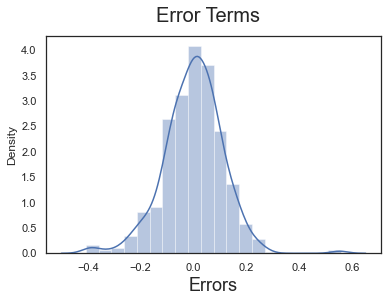

In [ ]:
##Residual analysis of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

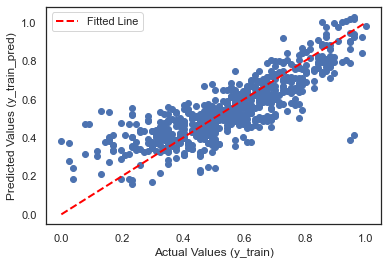

In [ ]:
plt.scatter(y_train, y_train_pred)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', linewidth=2, label='Fitted Line')
plt.xlabel('Actual Values (y_train)')
plt.ylabel('Predicted Values (y_train_pred)')
plt.legend()
plt.show()